Let's start by computing the histogram of a grayscale image:

In [10]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

Here I define a function to plot 2 images close using matplotlib converting also GBR to RGB

In [11]:
def biplot(left, right):
    left = cv2.cvtColor(left, cv2.COLOR_BGR2RGB)
    right = cv2.cvtColor(right, cv2.COLOR_BGR2RGB)

    plt.subplot(1,2,1)
    plt.imshow(left)
    plt.subplot(1,2,2)
    plt.imshow(right)
    plt.show()

def plot(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

cv2.calcHist(images, channels, mask, histSize, ranges[min, max])

In [12]:
img = cv2.imread('imgs\lenna.png')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

We plot the greyscale image histogram to show the distribution of the brightness

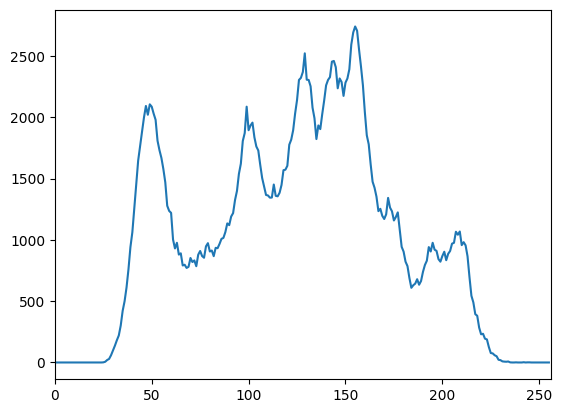

In [13]:
plt.plot(hist)
plt.xlim([0,256])
plt.show()

Now we can plot the histogram for the 3 channels

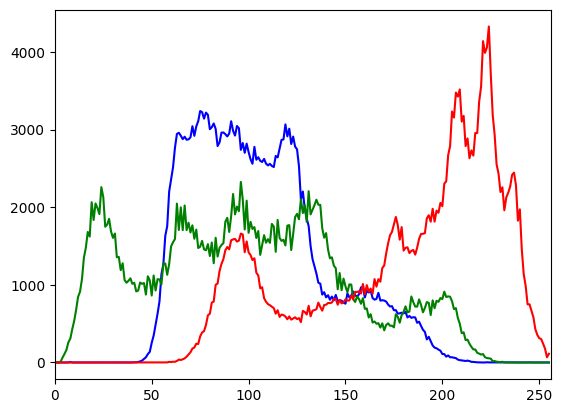

In [14]:
color = ('b','g','r')

for i,col in enumerate(color):
    hist = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color = col)
    plt.xlim([0,256])
plt.show()

Now that we have the histogram of an image, it is possible to use it for fixing the colours inside the image (if needed!). This process is called *histogram equalization*, and it is used to normalize the brightness and to increase the contrast of the image. Let's see how it works with grayscale images:

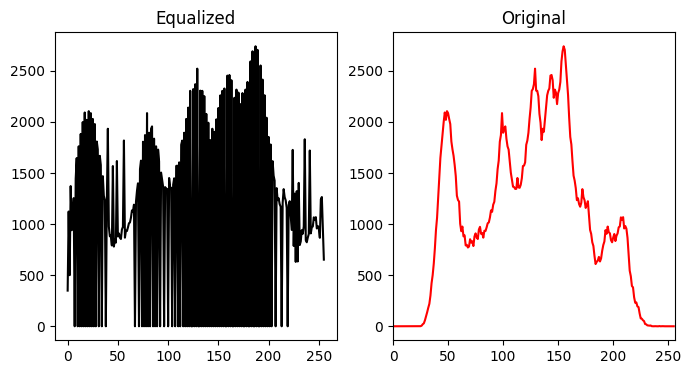

In [15]:
gray_image_eq = cv2.equalizeHist(gray_image)
fig = plt.figure(figsize=(8,4))

hist = cv2.calcHist([gray_image_eq], [0], None, [256], [0, 256])
left = plt.subplot(1,2,1)
plt.plot(hist, color = "k")

hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
right = plt.subplot(1,2,2)
plt.plot(hist, color = "r")

left.title.set_text('Equalized')
right.title.set_text('Original')

plt.xlim([0,256])
plt.show()


original greyscale vs equalized greyscale

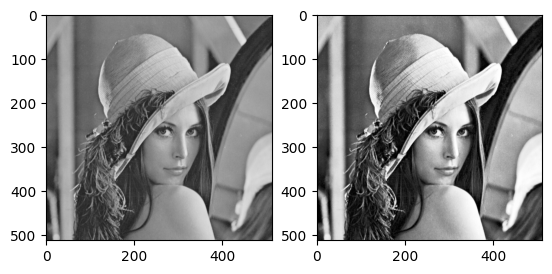

In [16]:
biplot(gray_image, gray_image_eq)

# +SHARPNESS

we are equalizing the greyscale image and converted back

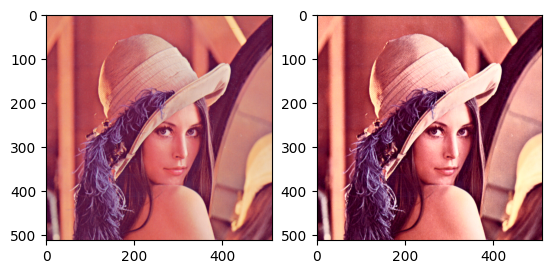

In [17]:
#convert grescale equalized image to color
img_eq = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_eq[:,:,0] = cv2.equalizeHist(img_eq[:,:,0])

# convert the YUV image back to RGB format
hist_eq = cv2.cvtColor(img_eq, cv2.COLOR_YUV2BGR)


biplot(img, hist_eq)

# Color balancing
we are equalizing each channel separately 


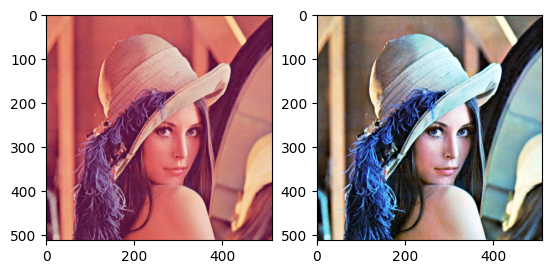

In [18]:
channels = cv2.split(img)
eq_channels = []

for ch in channels:
    eq_channels.append(cv2.equalizeHist(ch))
    
equalized = cv2.merge(eq_channels)

biplot(img, equalized)

Despite the new image may look good, its colours drastically changed due to the additive nature of the RGB color space. Hence, the best equalization approach is to change the color space of our image to one having the luminance/intensity channel, such as HSV:

<img src="imgs\hsv.jpg" width=500>

# CLAHE

Sometimes, the standard equalization process do not provides good results. Let's have a look at the following images:

<table>
    <tr>
        <td> <img src="imgs/before.jpg" width=400> </td>
        <td> <img src="imgs/after.jpg" width=400> </td>
    </tr>
    <tr>
        <td> Original Image </td>
        <td> After Equalization </td>
    </tr>
</table>

We can use the CLAHE method (Contrast Limited Adaptive Histogram Equalization)

Adaptive histogram equalization is used. 

1 -The image is divided into small blocks called "tiles" (tileSize is 8x8 by default in OpenCV). 

2 - Then each of these blocks are histogram equalized as usual. 

3 - To avoid amplifying noise, contrast limiting is applied.

4 - If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization.

5 - After equalization, to remove artifacts in tile borders, bilinear interpolation is applied.

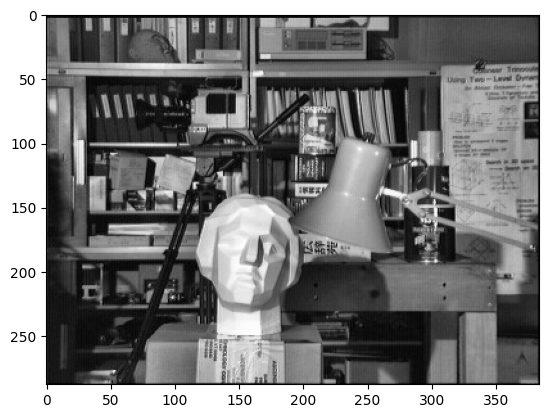

In [19]:
img = cv2.imread('imgs/before.jpg',cv2.IMREAD_GRAYSCALE)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
equalized = clahe.apply(img)

plot(equalized)